In [56]:
import pandas as pd
import numpy as np

# Download Data

In [57]:
import os
import gdown

folder = "data"
os.makedirs(folder, exist_ok=True)

output = os.path.join(folder, "bangkok_traffy.csv")
url = "https://drive.google.com/uc?id=19QkF8i1my99gjbyHe7de_qZNwgrca6R5"

if not os.path.exists(output):
    print("File not found. Downloading...")
    gdown.download(url, output, quiet=False)
    print("Download completed!")
else:
    print("File already exists. Skip downloading.")

File already exists. Skip downloading.


In [58]:
df = pd.read_csv(output)
df

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787021,KDDNBP,{ร้องเรียน},เขตหนองจอก,ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.86304,13.85633",เขตหนองจอก กรุงเทพมหานคร : VV47+G6M แขวงกระทุ่...,กระทุ่มราย,หนองจอก,กรุงเทพมหานคร,2025-01-16 02:50:24.112172+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:50:26.781334+00
787022,RYM99G,"{ความสะอาด,ถนน}","เขตคลองสาน,ฝ่ายสิ่งแวดล้อมฯ เขตคลองสาน",ปัญหา: บริเวณตลาดพระเครื่องพญาไม้ พบร้านอาหารต...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.49651,13.73469",39 ถ. สมเด็จเจ้าพระยา แขวงสมเด็จเจ้าพระยา เขตค...,สมเด็จเจ้าพระยา,คลองสาน,กรุงเทพมหานคร,2025-01-16 02:51:28.8957+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:23.119455+00
787023,2025-BDQ87Y,"{ร้องเรียน,ต้นไม้,ความปลอดภัย}",เขตราชเทวี,ต้นไม้บริเวณดังกล่าวช่วงโคนต้นไม้มันแห้งเหมือน...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53975,13.76426",10 ถ. ราชวิถี แขวงถนนพญาไท เขตราชเทวี กรุงเทพม...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,2025-01-16 02:52:33.878797+00,รอรับเรื่อง,NaN,0,2025-01-16 02:52:38.17364+00
787024,EZCZZU,{ถนน},เขตจอมทอง,ปัญหา: พบโรงกลึง (ไม่ทราบชื่อ) ทำงานบนพื้นผิวจ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.46226,13.67672",123 แขวงบางมด เขตจอมทอง กรุงเทพมหานคร 10150 ปร...,บางมด,จอมทอง,กรุงเทพมหานคร,2025-01-16 02:53:27.583947+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:30.250517+00


In [59]:
# Drop unused columns
cols_to_drop = [
    'photo', 'photo_after', 'address',
    'province', 'star', 'last_activity', 'organization',
    'state', 'type', 'subdistrict'
]
# 'ticket_id'
# 'district' # For Visualization

df = df.drop(columns=cols_to_drop, errors='ignore')

In [60]:
# Clean District Data
bkk_district = [
    "พระนคร","ป้อมปราบศัตรูพ่าย","สัมพันธวงศ์","ปทุมวัน","บางรัก","ยานนาวา","สาทร","บางคอแหลม",
    "ดุสิต","บางซื่อ","พญาไท","ราชเทวี","ห้วยขวาง","ดินแดง","พระโขนง","คลองเตย","ประเวศ",
    "สวนหลวง","บางเขน","ดอนเมือง","จตุจักร","บางกะปิ","ลาดพร้าว","บึงกุ่ม","หนองจอก",
    "มีนบุรี","ลาดกระบัง","ธนบุรี","คลองสาน","บางกอกน้อย","บางพลัด","บางกอกใหญ่","ภาษีเจริญ",
    "บางขุนเทียน","จอมทอง","ตลิ่งชัน","ราษฎร์บูรณะ","หนองแขม","วัฒนา","บางแค","หลักสี่","สายไหม",
    "คันนายาว","สะพานสูง","วังทองหลาง","คลองสามวา","บางนา","ทวีวัฒนา","ทุ่งครุ","บางบอน"
]

df["district"] = (
    df["district"]
    .astype(str)
    .str.replace("เขต", "", regex=False)
    .str.strip()
)

allowed = set(bkk_district)
df = df[df["district"].isin(allowed)].reset_index(drop=True)
df

,ticket_id,comment,coords,district,timestamp,count_reopen
0,2021-CGPMUN,น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,"100.66709,13.67891",ประเวศ,2021-09-19 14:56:08.924992+00,0
1,2021-7XATFA,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,"100.52649,13.72060",สาทร,2021-09-26 05:03:52.594898+00,0
2,2021-DVEWYM,ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,"100.59165,13.82280",ลาดพร้าว,2021-12-09 12:29:08.408763+00,0
3,2021-4D9Y98,หน้าปากซอย ลาดพร้าววังหิน26,"100.59131,13.80910",ลาดพร้าว,2021-12-13 05:53:36.861064+00,0
4,2021-7U9RED,ยังไม่มีหน่วยงานไหนมาดูแลครับ รถจะเชี่ยวหลายคน...,"100.50848,13.77832",ดุสิต,2021-12-17 08:46:02.610983+00,0
...,...,...,...,...,...,...
785685,KDDNBP,ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...,"100.86304,13.85633",หนองจอก,2025-01-16 02:50:24.112172+00,0
785686,RYM99G,ปัญหา: บริเวณตลาดพระเครื่องพญาไม้ พบร้านอาหารต...,"100.49651,13.73469",คลองสาน,2025-01-16 02:51:28.8957+00,0
785687,2025-BDQ87Y,ต้นไม้บริเวณดังกล่าวช่วงโคนต้นไม้มันแห้งเหมือน...,"100.53975,13.76426",ราชเทวี,2025-01-16 02:52:33.878797+00,0
785688,EZCZZU,ปัญหา: พบโรงกลึง (ไม่ทราบชื่อ) ทำงานบนพื้นผิวจ...,"100.46226,13.67672",จอมทอง,2025-01-16 02:53:27.583947+00,0


In [61]:
# Drop missing comment
df = df[df['comment'].notna()]
df['comment'] = df['comment'].astype(str).str.strip()

# Drop duplicate comments
df = df.drop_duplicates(subset=['comment'], keep='first').reset_index(drop=True)

# Drop empty comment
df = df[df['comment'] != ""]

C:\Users\Sandwish\AppData\Local\Temp\ipykernel_7572\2858178018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].astype(str).str.strip()


In [62]:
# Standardize timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop invalid timestamp
df = df[df['timestamp'].notna()]

# Year 2022
df = df[df['timestamp'].dt.year == 2022]

In [63]:
df.shape

(157763, 6)

In [64]:
cleaned_df = df.reset_index(drop=True)

cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157763 entries, 0 to 157762
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ticket_id     157763 non-null  object             
 1   comment       157763 non-null  object             
 2   coords        157763 non-null  object             
 3   district      157763 non-null  object             
 4   timestamp     157763 non-null  datetime64[ns, UTC]
 5   count_reopen  157763 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 7.2+ MB


,ticket_id,comment,coords,district,timestamp,count_reopen
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,"100.53764,13.70716",สาทร,2022-01-02 10:53:25.580723+00:00,0
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,"100.52674,13.70950",สาทร,2022-01-14 01:17:23.873811+00:00,0
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,"100.52678,13.70967",สาทร,2022-01-14 01:18:57.194155+00:00,0
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,"100.53025,13.70566",สาทร,2022-01-14 01:32:03.715912+00:00,0
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,"100.65816,13.68814",ประเวศ,2022-01-15 12:52:39.805944+00:00,0


In [65]:
# Check is null
cleaned_df.isna().sum()


ticket_id       0
comment         0
coords          0
district        0
timestamp       0
count_reopen    0
dtype: int64

## count_reopen

In [66]:
percentiles = [0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
cleaned_df['count_reopen'].quantile(percentiles)

0.900    0.0
0.950    1.0
0.970    1.0
0.980    1.0
0.990    2.0
0.995    3.0
0.999    6.0
Name: count_reopen, dtype: float64

In [67]:
import matplotlib.pyplot as plt

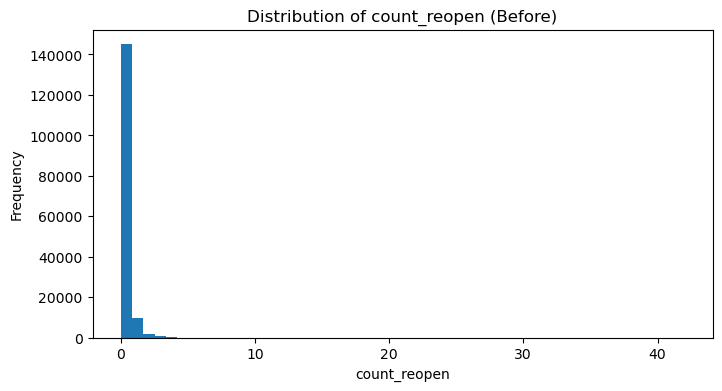

In [68]:
plt.figure(figsize=(8,4))
plt.hist(cleaned_df['count_reopen'], bins=50)
plt.title("Distribution of count_reopen (Before)")
plt.xlabel("count_reopen")
plt.ylabel("Frequency")
plt.show()

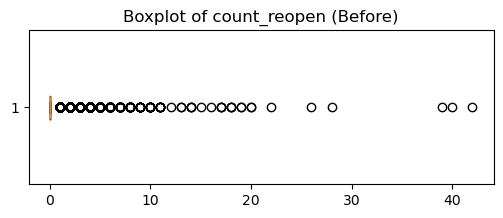

In [69]:
plt.figure(figsize=(6,2))
plt.boxplot(cleaned_df['count_reopen'], vert=False)
plt.title("Boxplot of count_reopen (Before)")
plt.show()

In [70]:
cleaned_df['count_reopen_log'] = np.log1p(cleaned_df['count_reopen'])


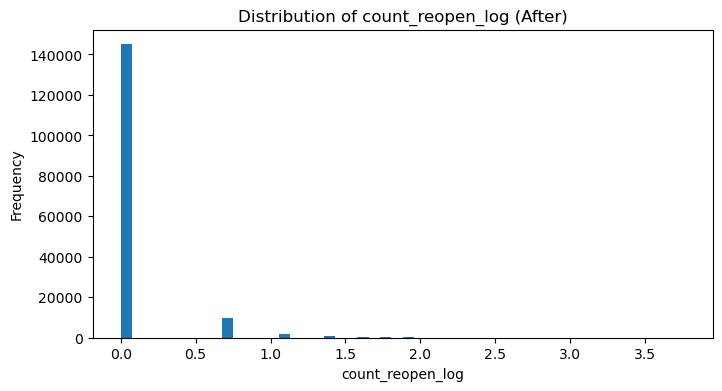

In [71]:
plt.figure(figsize=(8,4))
plt.hist(cleaned_df['count_reopen_log'], bins=50)
plt.title("Distribution of count_reopen_log (After)")
plt.xlabel("count_reopen_log")
plt.ylabel("Frequency")
plt.show()

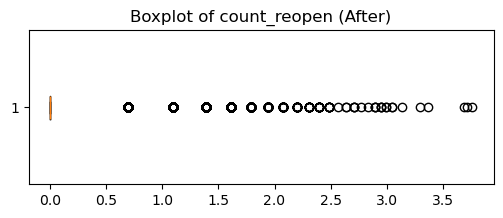

In [72]:
plt.figure(figsize=(6,2))
plt.boxplot(cleaned_df['count_reopen_log'], vert=False)
plt.title("Boxplot of count_reopen (After)")
plt.show()

In [73]:
percentiles = [0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
cleaned_df['count_reopen'].quantile(percentiles)

0.900    0.0
0.950    1.0
0.970    1.0
0.980    1.0
0.990    2.0
0.995    3.0
0.999    6.0
Name: count_reopen, dtype: float64

In [74]:
print(cleaned_df['count_reopen'].skew())
print(cleaned_df['count_reopen_log'].skew())

17.50679411014682
4.070226970283326


In [75]:
cleaned_df.shape

(157763, 7)

In [76]:
cleaned_df

,ticket_id,comment,coords,district,timestamp,count_reopen,count_reopen_log
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,"100.53764,13.70716",สาทร,2022-01-02 10:53:25.580723+00:00,0,0.0
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,"100.52674,13.70950",สาทร,2022-01-14 01:17:23.873811+00:00,0,0.0
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,"100.52678,13.70967",สาทร,2022-01-14 01:18:57.194155+00:00,0,0.0
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,"100.53025,13.70566",สาทร,2022-01-14 01:32:03.715912+00:00,0,0.0
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,"100.65816,13.68814",ประเวศ,2022-01-15 12:52:39.805944+00:00,0,0.0
...,...,...,...,...,...,...,...
157758,PTLMHD,มีการตั้งเวที ร้องเพลง ส่งเสียงดัง โดยจุดเกิดเ...,"100.56189,13.73713",วัฒนา,2022-12-31 20:03:10.221437+00:00,0,0.0
157759,MHFY48,ซอย (ไม่ทราบชื่อ) ถนนมังกร เขตป้อมปราบศัตรูพ่า...,"100.51280,13.74480",ป้อมปราบศัตรูพ่าย,2022-12-31 20:37:37.226395+00:00,0,0.0
157760,NNFVLK,เปิดเพลงเสียงดังตั้งแต่ตอนเช้าจนถึงตีสี่ยังไม่...,"100.42785,13.68924",ภาษีเจริญ,2022-12-31 20:52:02.074206+00:00,0,0.0
157761,6LZVNJ,เสียงดังรบกวนรำคาน นอนไม่ได้ ผู้แจ้งไม่แน่ใจว่...,"100.56181,13.73713",วัฒนา,2022-12-31 21:28:10.060293+00:00,0,0.0


In [77]:
cleaned_df.columns

Index(['ticket_id', 'comment', 'coords', 'district', 'timestamp',
       'count_reopen', 'count_reopen_log'],
      dtype='object')

In [78]:
cleaned_df.to_csv(os.path.join(folder, "cleaned_df.csv"), index=False)